In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy.stats.stats import pearsonr
sns.set_style('whitegrid')

In [180]:
address = '/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/Movie dataset.csv'
movie = pd.read_csv(address)
movie.columns = ['Movie', 'Year', 'Ratings', 'Genre', 'Gross', 'Budget', 'Sequel', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']

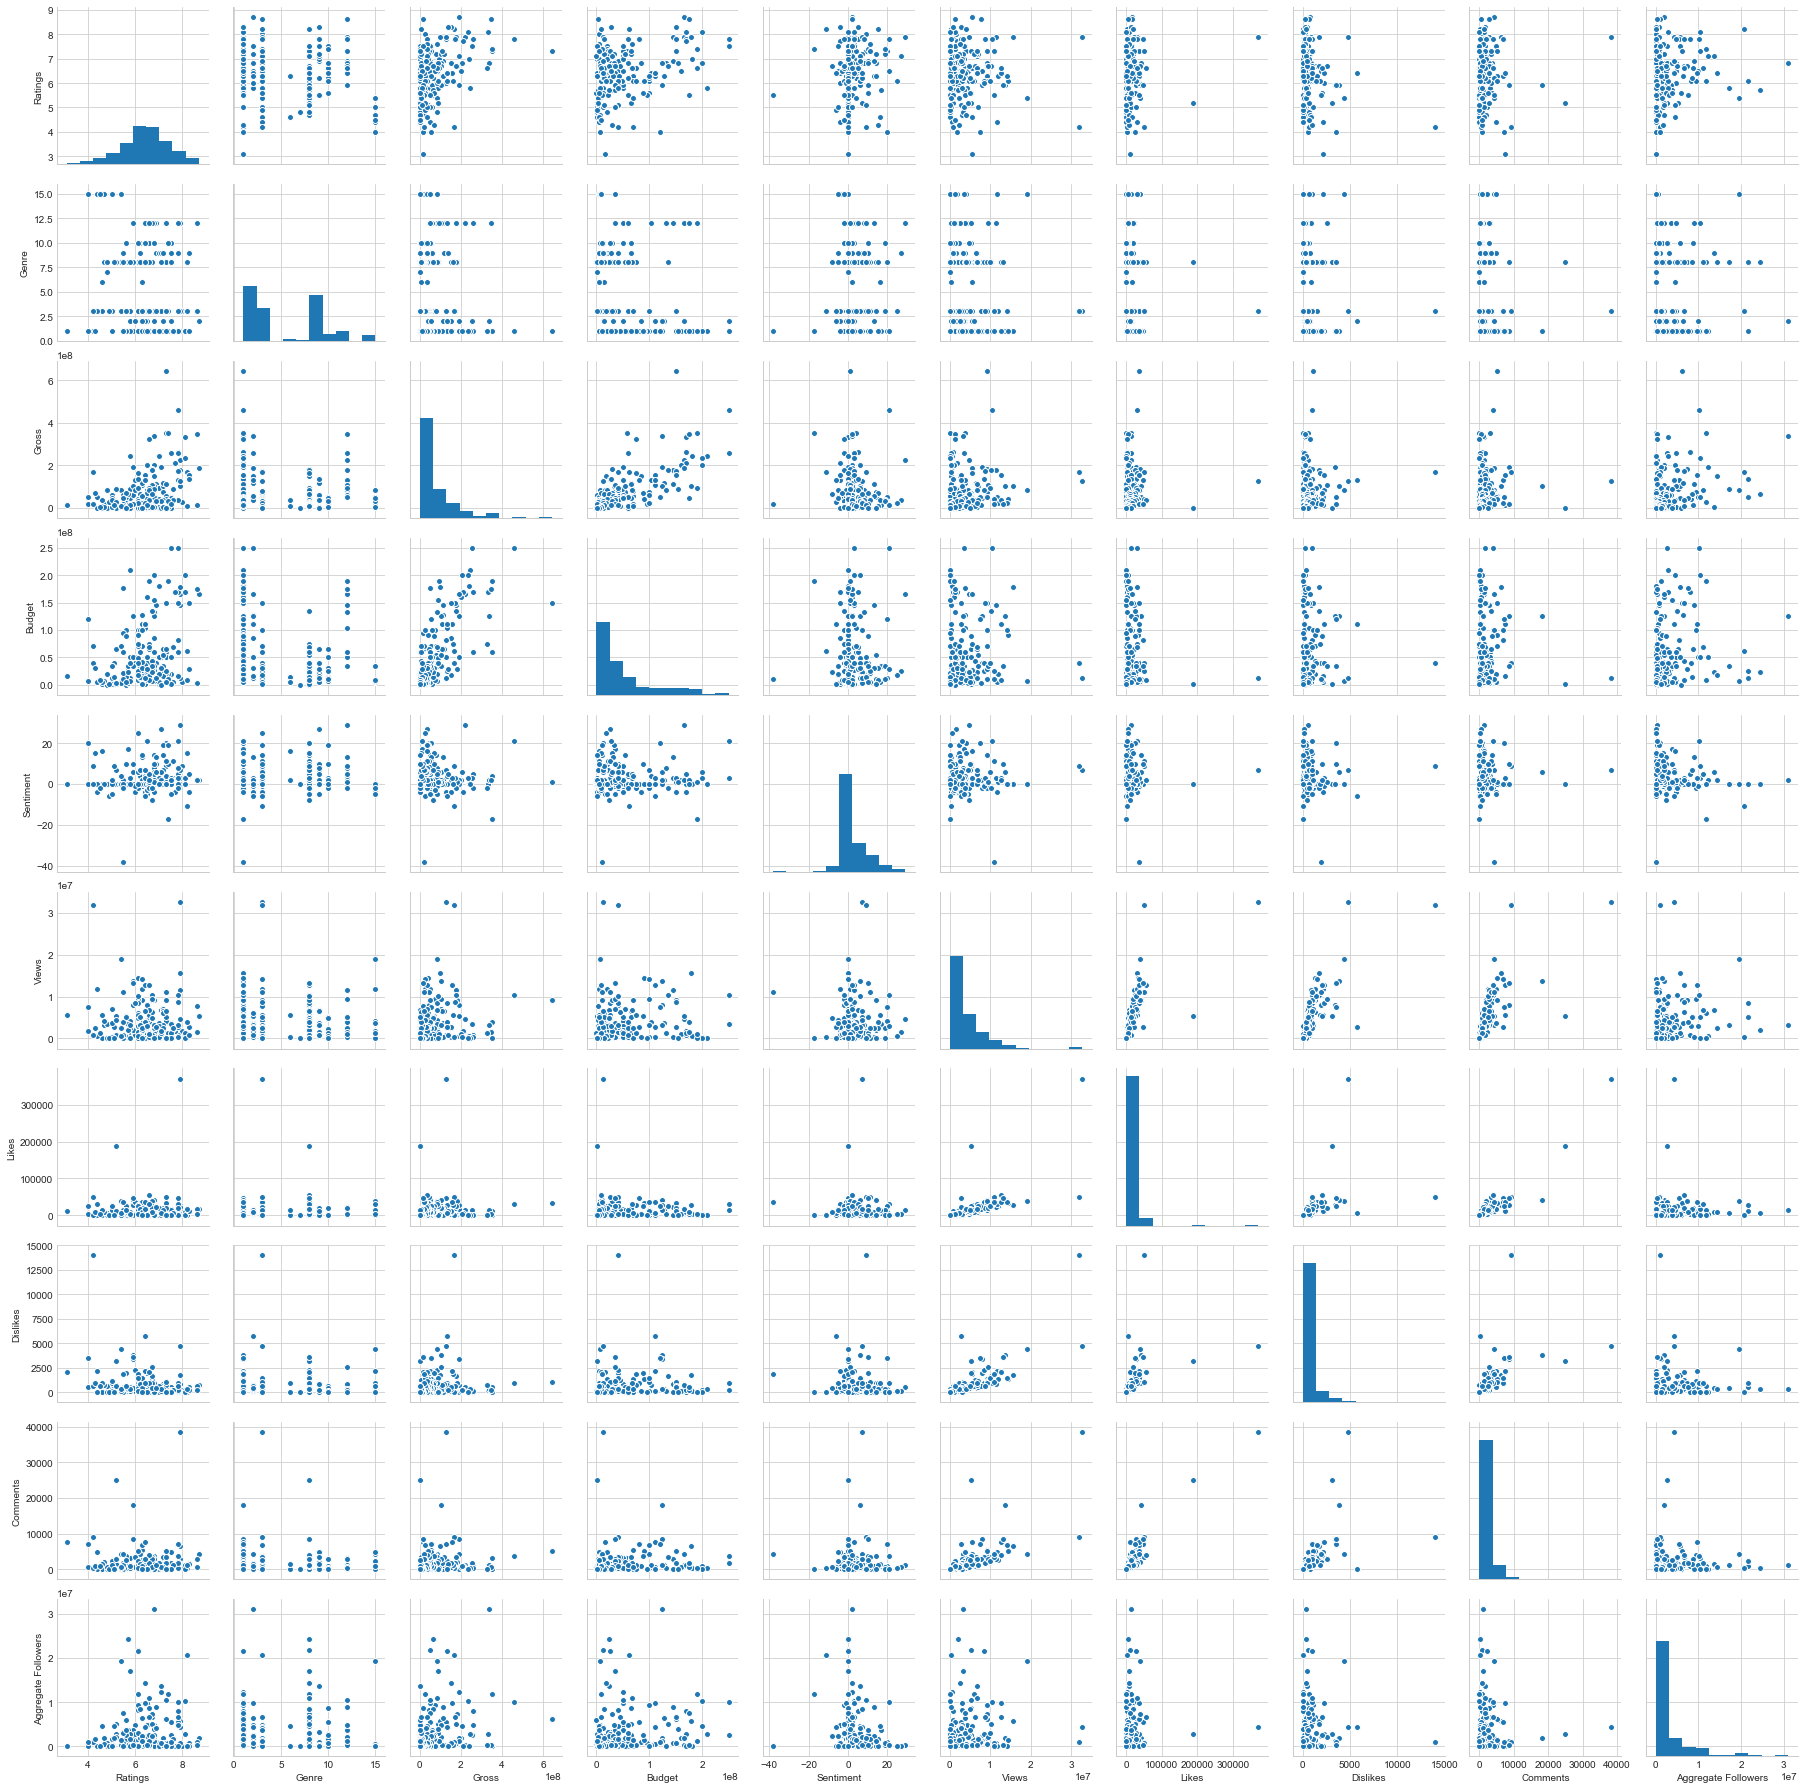

In [181]:
X = movie[['Ratings', 'Genre', 'Gross', 'Budget', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']]
sns.pairplot(X.dropna())
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/pairplot.png', bbox_inches = 'tight')

In [188]:
Ratings = movie['Ratings'].dropna()
Genre = movie['Genre'].dropna()
#pearsonr_coefficient, p_value = pearsonr(Ratings, Genre)
print "PearsonR Cprrelation Coefficient %0.3f" % (pearsonr_coefficient)
print pearsonr(Ratings, Genre)
Gross = movie['Gross'].dropna()
Budget = movie['Budget'].dropna()
Views = movie['Views'].dropna()
Likes = movie['Likes'].dropna()
Dislikes = movie['Dislikes'].dropna()
Comments = movie['Comments'].dropna()
#pearsonr_coefficient, p_value = pearsonr(Gross, Budget)
pearsonr_coefficient, p_value = pearsonr(Views, Likes)
#pearsonr_coefficient, p_value = pearsonr(Views, Dislikes)
#pearsonr_coefficient, p_value = pearsonr(Views, Comments)
print "PearsonR Cprrelation Coefficient %0.3f" % (pearsonr_coefficient)

PearsonR Cprrelation Coefficient 0.711
(-0.11673532294395822, 0.076617735788187966)
PearsonR Cprrelation Coefficient 0.677


In [120]:
corr = X.corr()
corr

,Ratings,Genre,Gross,Budget,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Ratings,1.000000,-0.116735,0.342204,0.288157,0.143182,0.011710,0.073824,-0.187422,0.015679,0.078545
Genre,-0.116735,1.000000,-0.197009,-0.264286,-0.010831,-0.032047,-0.043544,-0.031730,-0.099919,0.008700
Gross,0.342204,-0.197009,1.000000,0.719839,-0.017100,0.176363,0.110432,0.161536,0.125960,0.301808
Budget,0.288157,-0.264286,0.719839,1.000000,0.033616,0.114708,0.011701,0.096888,0.090559,0.168874
Sentiment,0.143182,-0.010831,-0.017100,0.033616,1.000000,0.064134,0.053883,0.040574,0.056372,-0.092922
Views,0.011710,-0.032047,0.176363,0.114708,0.064134,1.000000,0.677175,0.776105,0.710507,0.155044
Likes,0.073824,-0.043544,0.110432,0.011701,0.053883,0.677175,1.000000,0.470645,0.917492,0.078575
Dislikes,-0.187422,-0.031730,0.161536,0.096888,0.040574,0.776105,0.470645,1.000000,0.579966,0.052877
Comments,0.015679,-0.099919,0.125960,0.090559,0.056372,0.710507,0.917492,0.579966,1.000000,0.034332
Aggregate Followers,0.078545,0.008700,0.301808,0.168874,-0.092922,0.155044,0.078575,0.052877,0.034332,1.000000


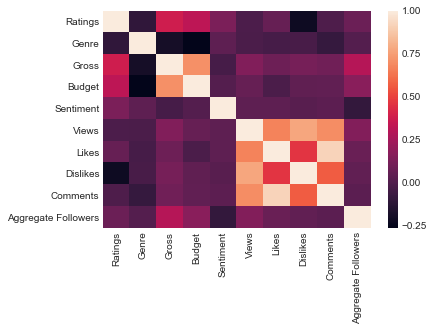

In [173]:
sns.heatmap(X.dropna().corr())
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/pearsonr_heatmap.png', bbox_inches = 'tight')

In [122]:
corr = X.corr()
corr.to_csv('/Users/liuyang/Documents/Spring 2018/MIS 587/corr.csv', sep=',')

In [123]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [124]:
def cosine_similarity(matrix):
    norm = pd.DataFrame(np.sqrt(np.square(matrix).sum(axis = 1)))
    denominator = norm.dot(norm.T)
    numerator = matrix.dot(matrix.T)
    similarity_matrix = numerator.divide(denominator,axis =0)
    return similarity_matrix

In [80]:
#X_matrix = X.as_matrix()

In [125]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X_matrix = X.as_matrix()
cos = 1-pairwise_distances(X_matrix, metric="cosine")

In [177]:
#cos

In [175]:
#sns.heatmap(cos)

In [176]:
m= pd.DataFrame.transpose(movie)
n= m.drop(['Movie', 'Year', 'Sequel'])
b = n.replace(np.nan, 0)

In [131]:
#n = n.replace([np.inf, -np.inf], np.nan).dropna()
b_matrix = b.as_matrix()
b_matrix

array([[  6.30000000e+00,   7.10000000e+00,   6.20000000e+00, ...,
          5.40000000e+00,   4.40000000e+00,   0.00000000e+00],
       [  8.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.50000000e+01,   0.00000000e+00],
       [  9.13000000e+03,   1.92000000e+08,   3.07000000e+07, ...,
          1.23000000e+07,   2.26000000e+07,   0.00000000e+00],
       ..., 
       [  4.25000000e+02,   6.10000000e+01,   3.40000000e+01, ...,
          6.70000000e+01,   4.31000000e+02,   0.00000000e+00],
       [  6.36000000e+02,   1.86000000e+02,   4.70000000e+01, ...,
          2.01000000e+02,   6.06000000e+02,   0.00000000e+00],
       [  1.12000000e+06,   1.23500000e+07,   4.83000000e+05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [189]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
#n = n.replace([np.inf, -np.inf], np.nan).dropna()
#n_matrix = n.as_matrix()
a =1-pairwise_distances(b_matrix, metric="cosine")
a

array([[ 1.        ,  0.77198176,  0.64282735,  0.68593919,  0.38913029,
         0.63033968,  0.4103376 ,  0.44952306,  0.45284988,  0.48845226],
       [ 0.77198176,  1.        ,  0.38661834,  0.40168005,  0.28949971,
         0.48879647,  0.29623502,  0.36307473,  0.30680019,  0.3799077 ],
       [ 0.64282735,  0.38661834,  1.        ,  0.83138763,  0.2146711 ,
         0.49528578,  0.32652251,  0.40459695,  0.36652058,  0.51989014],
       [ 0.68593919,  0.40168005,  0.83138763,  1.        ,  0.27124631,
         0.48870037,  0.27679794,  0.38231977,  0.36312286,  0.45462521],
       [ 0.38913029,  0.28949971,  0.2146711 ,  0.27124631,  1.        ,
         0.28344643,  0.19682378,  0.21219784,  0.21677625,  0.10909025],
       [ 0.63033968,  0.48879647,  0.49528578,  0.48870037,  0.28344643,
         1.        ,  0.73525304,  0.83064596,  0.77796081,  0.41809732],
       [ 0.4103376 ,  0.29623502,  0.32652251,  0.27679794,  0.19682378,
         0.73525304,  1.        ,  0.57183213

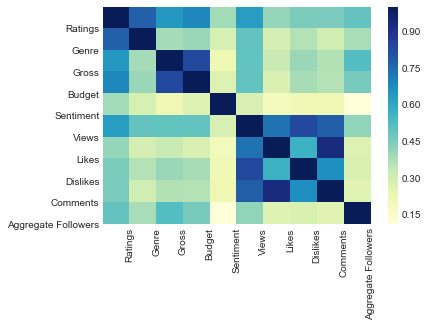

In [174]:
ax = sns.heatmap(a, cmap = "YlGnBu")
ax.set(xticks=range(1, 11), xticklabels=list(['Ratings', 'Genre', 'Gross', 'Budget', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']))
for label in ax.get_xticklabels():
        label.set_rotation(90)
ax.set(yticks=range(1, 11), yticklabels=list(['Ratings', 'Genre', 'Gross', 'Budget', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers']))
for label in ax.get_yticklabels():
        label.set_rotation(0)
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/cosine_heatmap.png', bbox_inches = 'tight')
                                     